In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame

from numpy.random import multivariate_normal

In [2]:
N1 = 20
M1 = [15, 10]

N2 = 30
M2 = [0, 0]

Iter = 30

Var = [15, 30]

In [3]:
def prepare_dataset(var):
    cov = np.array([[var, 0], [0, var]])
    
    df1 = DataFrame(multivariate_normal(M1, cov, N1), columns=['x', 'y'])
    df1['type'] = 1
    df2 = DataFrame(multivariate_normal(M2, cov, N2), columns=['x', 'y'])
    df2['type'] = -1
    
    df = pd.concat([df1, df2], ignore_index=True)
    df = df.reindex(np.random.permutation(df.index)).reset_index(drop=True)
    return df

In [4]:
test = prepare_dataset(15)
test

,x,y,type
0,11.044154,8.550265,1
1,18.164209,14.067508,1
2,-8.732403,3.794809,-1
3,16.901266,8.920264,1
4,21.404123,6.529504,1
5,3.556826,0.120691,-1
6,16.741860,13.973861,1
7,10.933155,6.051709,1
8,1.632178,-2.119080,-1
9,-0.478619,-7.579892,-1


In [7]:
def run_simulation(variance, data_graph, param_graph):
    train = prepare_dataset(variance)
    train1 = train[train['type']==1]
    train2 = train[train['type']==-1]
    ymin, ymax = train.y.min()-5, train.y.max()+5
    xmin, xmax = train.x.min()-5, train.x.max()+5
    
    data_graph.set_ylim([ymin-1, ymax+1])
    data_graph.set_xlim([xmin-1, xmax+1])
    data_graph.scatter(train1.x, train1.y, marker='o')
    data_graph.scatter(train2.x, train2.y, marker='x')
    
    w0 = w1 = w2 = 0.0
    bias = 1
    #bias = 0.5 * (train.x.abs().mean() + train.y.abs().mean())
    
    paramhist = DataFrame([[w0, w1, w2]], columns=['w0', 'w1', 'w2'])
    for i in range(Iter):
        for index, point in train.iterrows():
            x, y, ty = point.x, point.y, point.type
            if ty * (w0 * bias + w1 * x + w2 * y) <=0:
                w0 += ty * bias
                w1 += ty * x
                w2 += ty * y
        paramhist = paramhist.append(Series([w0, w1, w2], ['w0', 'w1', 'w2']), ignore_index=True)
    
    err = 0.0
    for index, point in train.iterrows():
        x, y, ty = point.x, point.y, point.type
        if ty * (w0 * bias + w1 * x + w2 * y) <=0:
            err += 1
    err_rate = err * 100 / len(train)
    
    linex = np.arange(xmin-5, xmax+5)
    liney = -linex * w1 / w2 - bias * w0 / w2
    
    data_graph.plot(linex, liney, label= f'ERR {err_rate:.2f}', color='red')
    data_graph.legend(loc=1)
    paramhist.plot(ax=param_graph)
    param_graph.legend(loc=1)    

<ipython-input-8-f339f5fbcc68>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


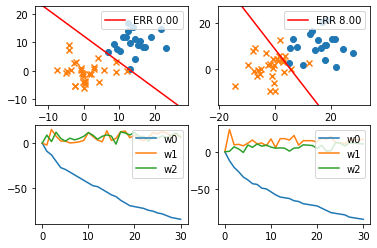

In [8]:
fig = plt.figure()
for c, variance in enumerate(Var):
    subplot1 = fig.add_subplot(2, 2, c+1)
    subplot2 = fig.add_subplot(2, 2, c+2+1)
    run_simulation(variance, subplot1, subplot2)
fig.show()